In [8]:
# Sachin case

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import norm,binom,ttest_1samp,ttest_ind_from_stats
from statsmodels.stats.weightstats import ztest

In [10]:
data = pd.read_csv('Sachin_ODI.csv')

In [11]:
from scipy.stats import t
round(t.ppf(0.1/2, df=44),2)

-1.68

In [12]:
data

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14,0,34,15,2,0,93.33,2,Australia,Sydney,2012-02-26,Australia,False,False
356,39,0,45,30,5,0,130.00,2,Sri Lanka,Hobart,2012-02-28,India,True,False
357,6,0,25,19,1,0,31.57,1,Sri Lanka,Dhaka,2012-03-13,India,True,False
358,114,0,205,147,12,1,77.55,1,Bangladesh,Dhaka,2012-03-16,Bangladesh,False,True


In [13]:
# Questions
# Was sachine batting bette rif india batted first?
# Did sachin score more runs when india won?

In [14]:
# Assuming data is in gaussian distribution

In [15]:
mu = data['runs'].mean()
std = data['runs'].std()
print(f'population mu : {mu} , population std : {std}')

population mu : 43.24166666666667 , population std : 42.18245206052441


In [16]:
data.groupby(['Inns'])['runs'].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

# H0 : Sachine does not score more tha usual average
# Ha : Sachine score more than usual average
alpha = 0.01

In [17]:
first_inning_runs = data[data['Inns']==1][['runs']]
first_inning_runs
print(first_inning_runs.mean())

runs    46.670588
dtype: float64


In [18]:
z = (first_inning_runs.mean() - mu) / (std/np.sqrt(len(first_inning_runs)))
print(f'z:{z}')
p = 1 - norm.cdf(z)
print(f'p : {p}')
# we are failed to reject H0

z:runs    1.059864
dtype: float64
p : [0.14460321]


# India wins the match - Does Sachine score higher if india wins?
H0 : sachin mean score when india wins is similar to overall performance

Ha : sachine scores higher when india wins

alpha = 0.05

In [19]:
data.groupby(['Won'])['runs'].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [20]:
all_victory_runs = data[data['Won']==True][['runs']]
z = (all_victory_runs.mean() - mu) / (std/np.sqrt(len(all_victory_runs)))
print(f'z:{z}')
p = 1 - norm.cdf(z)
print(f'p : {p}')
# we are failed to reject H0

z:runs    2.494856
dtype: float64
p : [0.00630041]


In [21]:
# when n >30 we can use z as well as t test

In [22]:
ztest(all_victory_runs,value=mu,alternative="larger")

(array([2.35695059]), array([0.00921285]))

In [23]:
ttest_1samp(all_victory_runs,popmean=mu,alternative="greater")

Ttest_1sampResult(statistic=array([2.35695059]), pvalue=array([0.00974129]))

In [24]:
import math 
z = (530-500)/(125/math.sqrt(70))
print(round(z,2))

2.01


In [25]:
round(1-norm.cdf(z),2)

0.02

In [26]:
z = (1.85-1.7)/(0.5/math.sqrt(30))
print(round(z,2))
print(round(1-norm.cdf(z),2))

1.64
0.05


In [27]:
p = ((0.7/math.sqrt(45)) * 1.28)
print(p+3.72)

3.8535677938559876


In [28]:
t = (77.4-90)/(29.6/math.sqrt(9))
print(round(t,2))

-1.28


In [29]:
num = 5.4- 6 
sme = 1.1/(math.sqrt(15))
print(num/sme)

-2.1125363706585896


# Two durg recovery test

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind,kstest
from statsmodels.stats.weightstats import ztest
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

In [31]:
d1 = pd.read_csv('drug_1_recovery.csv')
d2 = pd.read_csv('drug_2_recovery.csv')

In [32]:
print("d1 mean" , d1.mean())
print("d2 mean" , d2.mean())

d1 mean drug_1    7.104917
dtype: float64
d2 mean drug_2    8.073423
dtype: float64


In [33]:
#H0 : u1 = u2
#Ha : u1 < u2
alpha = 0.01
stats,p_value = ttest_ind(d1,d2,alternative='less')
print("test_stats",stats)
print("p_value",p_value)
if(p_value < alpha):
    print("H0 rejected")
else:
    print("H0 accepted")

test_stats [-5.32112438]
p_value [1.27713574e-07]
H0 rejected


In [34]:
# two tail
#H0 : u1 = u2
#Ha : u1 != u2
alpha = 0.01
stats,p_value = ttest_ind(d1,d2)
print("test_stats",stats)
print("p_value",p_value)
if(p_value < alpha):
    print("H0 rejected")
else:
    print("H0 accepted")

test_stats [-5.32112438]
p_value [2.55427147e-07]
H0 rejected


In [35]:
# right tail
#H0 : u1 = u2
#Ha : u1 != u2
alpha = 0.01
stats,p_value = ttest_ind(d1,d2,alternative='greater')
print("test_stats",stats)
print("p_value",p_value)
if(p_value < alpha):
    print("H0 rejected")
else:
    print("H0 accepted")

test_stats [-5.32112438]
p_value [0.99999987]
H0 accepted


In [36]:
data = pd.read_csv('Sachin_ODI.csv')

In [37]:
data

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14,0,34,15,2,0,93.33,2,Australia,Sydney,2012-02-26,Australia,False,False
356,39,0,45,30,5,0,130.00,2,Sri Lanka,Hobart,2012-02-28,India,True,False
357,6,0,25,19,1,0,31.57,1,Sri Lanka,Dhaka,2012-03-13,India,True,False
358,114,0,205,147,12,1,77.55,1,Bangladesh,Dhaka,2012-03-16,Bangladesh,False,True


In [38]:
d1 = data[data['Inns']==1]['runs'] # india bats 1st
d2 = data[data['Inns']==2]['runs'] # india bats 2nd


# H0 : X,Y belong to same distribution
# Ha : X,Y does not belong to same distribution

In [39]:
e1 = ECDF(d1)
e2 = ECDF(d2)

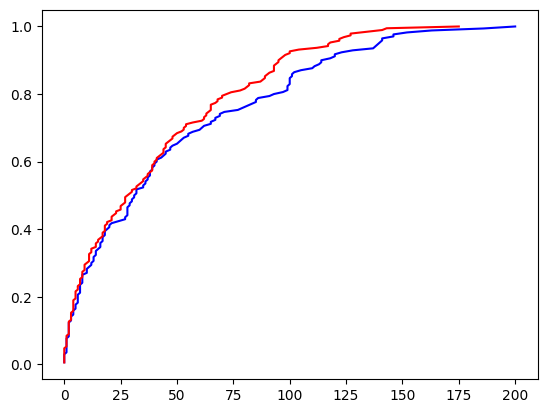

In [40]:
plt.plot(e1.x,e1.y,c='b')
plt.plot(e2.x,e2.y,c='r')
plt.show()

In [41]:
kstest(d1,d2)

KstestResult(statistic=0.10990712074303406, pvalue=0.20868747831732348)

In [42]:
# Runs when india won Vs lost

In [43]:
d1 = data[data['Won']==True]['runs'] 
d2 = data[data['Won']==False]['runs']


In [44]:
d2

0       13
1       37
4        4
7       30
10      65
      ... 
352     15
353      3
354     22
355     14
358    114
Name: runs, Length: 176, dtype: int64

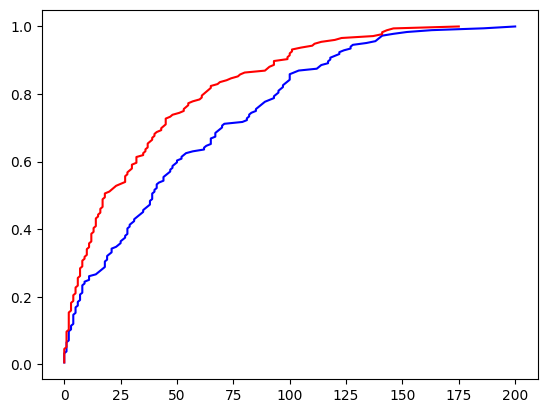

In [45]:
e1 = ECDF(d1)
e2 = ECDF(d2)
plt.plot(e1.x,e1.y,c='b')
plt.plot(e2.x,e2.y,c='r')
plt.show()

In [46]:
kstest(d1,d2)
# reject H0

KstestResult(statistic=0.20602766798418973, pvalue=0.0007769531141111421)

In [47]:
# Hypo-3 : Q4
data = pd.DataFrame([193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191, 144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191],columns=['value'])

In [54]:
t_stat, p_value = ttest_1samp(data, popmean=190, alternative="greater")
print(t_stat)
print(p_value)

[1.36890299]
[0.08898892]


In [48]:
sample_mean,sample_std = data.mean(),data.std()
print(f'mean : {round(sample_mean,2)},std :{round(sample_std,2)}')

mean : value    199.49
dtype: float64,std :value    46.5
dtype: float64


In [49]:
from scipy.stats import t

In [51]:
t.ppf(0.1/2,df=44)

-1.680229975365252

In [55]:
female_scores=pd.DataFrame([25,30,45,49,47,35,32,42])

male_scores=pd.DataFrame([45,47,25,22,29,32,27,28,40,49,50,33])
ttest_ind(female_scores,male_scores,alternative='greater')

Ttest_indResult(statistic=array([0.57954502]), pvalue=array([0.28470238]))